### DemApp00:
# Approximating using the CompEcon toolbox

In [1]:
import numpy as np
from numpy.linalg import norm, cond
from compecon import Basis, BasisChebyshev, Interpolator
from compecon.tools import nodeunif
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#from matplotlib import rcParams as settings
import seaborn as sns
sns.set_style('dark')
%matplotlib notebook

C:\Program Files\Anaconda3\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


## Univariate approximation
Define function and derivative

In [2]:
f = lambda x: np.exp(-2 * x)
df = lambda x: -2 * np.exp(-2 * x)

Fit approximant

In [3]:
n, a, b = 10, -1, 1
f_fit = Interpolator(n, a, b, y=f)

Compute residuals

In [4]:
x = np.linspace(a, b, 1001)
resid = (f_fit(x) - f(x)).flatten()
resid_derivative = (f_fit(x, 1) - df(x)).flatten()

Graph approximation error for function and derivative

<IPython.core.display.Javascript object>


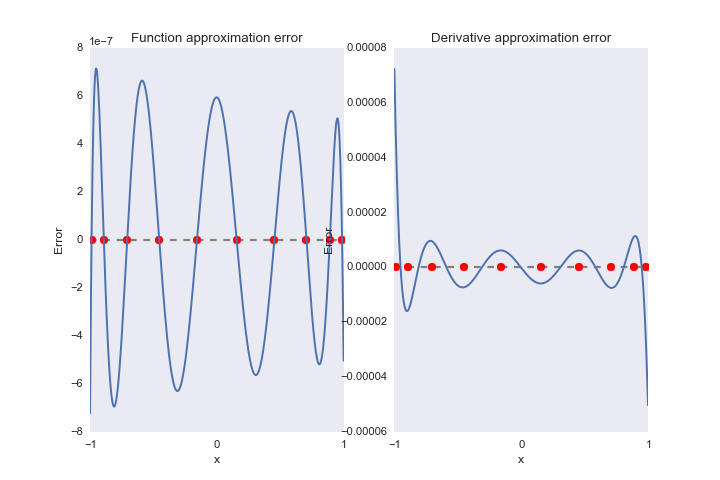

In [5]:
axopts = {'xlabel': 'x', 'ylabel': 'Error', 'xticks': [-1, 0, 1]}

fig1 = plt.figure(figsize=[9, 6])

ax1 = fig1.add_subplot(121, title='Function approximation error', **axopts)
ax1.axhline(linestyle='--', color='gray', linewidth=2)
ax1.plot(f_fit.nodes, np.zeros_like(f_fit.nodes), 'ro', markersize=8)
ax1.plot(x, resid)

ax2 = fig1.add_subplot(122, title='Derivative approximation error', **axopts)
ax2.plot(x, np.zeros_like(x), '--', color='gray', linewidth=2)
ax2.plot(f_fit.nodes, np.zeros_like(f_fit.nodes), 'ro', markersize=8)
ax2.plot(x, resid_derivative)

fig1.show()

## Bivariate Interpolation

Define function

In [6]:
g = lambda x: np.cos(x[0]) / np.exp(x[1])

Set degree and domain interpolation

In [7]:
n, a, b = [7, 7], [0, 0], [1, 1]
g_fit = Interpolator(n, a, b, y=g)

Plot of function approximation error

<IPython.core.display.Javascript object>


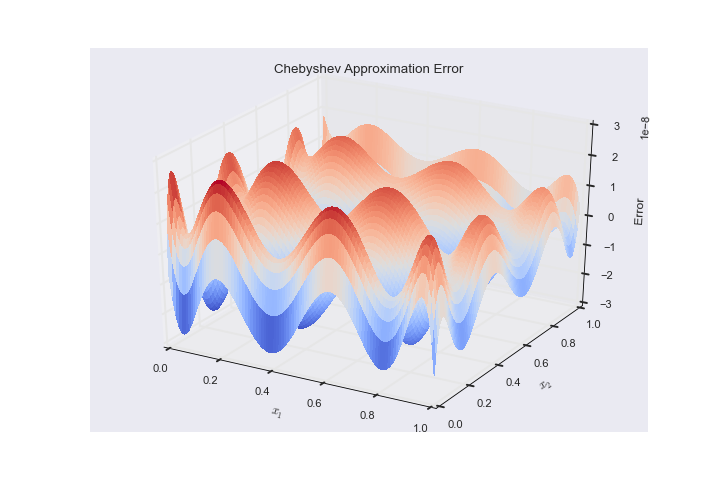

In [8]:
nplot = [101, 101]
x = nodeunif(nplot, a, b)
x1, x2 = x
error = g_fit(x) - g(x)
error.shape = nplot
x1.shape = nplot
x2.shape = nplot

fig2 = plt.figure(figsize=[9, 6])
ax = fig2.gca(projection='3d', title='Chebyshev Approximation Error',
             xlabel='$x_1$', ylabel='$x_2$', zlabel='Error')
ax.plot_surface(x1, x2, error, rstride=1, cstride=1, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)
fig2.show()

### Compute partial Derivatives

In [9]:
x = np.array([[0.5], [0.5]])
g1 = g_fit(x, [1, 0])
g2 = g_fit(x, [0, 1])
g11 = g_fit(x, [2, 0])
g12 = g_fit(x, [1, 1])
g22 = g_fit(x, [0, 2])




strfmt = 'x = [0.5, 0.5]\ng1  = {:7.4f}\ng2  = {:7.4f}\ng11 = {:7.4f}\ng12 = {:7.4f}\ng22 = {:7.4f}'
values = [k[0,0] for k in [g1, g2, g11, g12, g22]] # to convert arrays to scalars
print(strfmt.format(*values))

x = [0.5, 0.5]
g1  = -0.2908
g2  = -0.5323
g11 = -0.5323
g12 =  0.2908
g22 =  0.5323


Another way, less typing

In [10]:
order = np.array([[1, 0, 2, 1, 0], 
                  [0, 1, 0, 1, 2]])

print(strfmt.format(*(g_fit(x, order).flatten())))

x = [0.5, 0.5]
g1  = -0.2908
g2  = -0.5323
g11 = -0.5323
g12 =  0.2908
g22 =  0.5323
